In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

from math import sqrt

np.random.seed(5)


# 1. 데이터셋 생성하기
signal_data = pd.read_csv('price_pear_S.csv', engine='python', encoding='ms949')
data = signal_data.values
retail_price = data

#std = np.std(df[‘retail_price’].values)

#create_ dataset
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 1:])
        dataY.append(signal_data[i + look_back, -1])
    return np.array(dataX), np.array(dataY)

look_back = 7

#2. 데이터셋 분할
X, Y = create_dataset(data, look_back)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
Y

array([28250., 28250., 28250., ..., 25822., 25822., 25822.])

In [3]:
train_stats = signal_data.describe()
train_stats.pop("date")
train_stats = train_stats.transpose()

train_stats


,count,mean,std,min,25%,50%,75%,max
mean(°C),1423.0,13.620379,10.893937,-14.8,4.5,15.0,23.0,33.7
prep(mm),1423.0,3.073717,11.866609,0.0,0.0,0.0,0.2,144.5
humidity(%),1423.0,57.801546,14.823950,21.8,46.8,57.8,67.7,97.0
whole_price,1423.0,48076.600843,9486.930097,30000.0,40000.0,47000.0,55000.0,80000.0
retail_price,1423.0,32470.880534,4629.934271,24404.0,28667.0,31851.0,34739.0,45408.0


In [4]:
rtp = retail_price[:,-1]
print(rtp)

[28250. 28250. 28250. ... 25822. 25822. 25822.]


In [5]:
std = np.std(rtp)

In [6]:
std

4628.307163083211

### create dataset을 수행한 뒤 데이터 분할

In [7]:
signal_data.shape

(1423, 6)

In [8]:
# 데이터셋 생성
x_train = X[0:850,]
y_train = Y[0:850,] 

x_val = X[850:1100]
y_val = Y[850:1100]

x_test = X[1100:,]
y_test = Y[1100:,]
y_test_var = y_test


In [9]:
# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(32, input_shape=(7, 5), activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
#model.add(Dropout(0.3))
model.add(Dense(1))

#3. 모델 아키텍쳐 살펴보기
# model.summary()

# 4. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [10]:
#5.모델 학습시키기
#5.1. Early Stopping
callbacks_list = [
    EarlyStopping(
    monitor='val_loss',
    patience=20 ,
    ),
#     ModelCheckpoint(
#     filepath='multi_model.h5',
#     monitor='val_loss',
#     save_best_only = True,
#     )
]


In [11]:
# 5.2 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=300, batch_size=16, callbacks=callbacks_list, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 850 samples, validate on 250 samples
Epoch 1/300





850/850 [==============================] - 5s 5ms/step - loss: 749632127.6988 - mean_absolute_error: 26575.4717 - val_loss: 344428764.6720 - val_mean_absolute_error: 17582.4821
Epoch 2/300
192/850 [=====>........................] - ETA: 0s - loss: 255243474.6667 - mean_absolute_error: 14058.8098

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_mean_absolute_error,loss,mean_absolute_error
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


850/850 [==============================] - 1s 1ms/step - loss: 102719965.0071 - mean_absolute_error: 7442.4663 - val_loss: 103630111.1680 - val_mean_absolute_error: 8305.0859
Epoch 3/300
850/850 [==============================] - 1s 960us/step - loss: 148972566.5035 - mean_absolute_error: 9348.7767 - val_loss: 98748084.4960 - val_mean_absolute_error: 5464.7534
Epoch 4/300
850/850 [==============================] - 1s 925us/step - loss: 160435983.0376 - mean_absolute_error: 8589.8931 - val_loss: 663409225.7280 - val_mean_absolute_error: 24025.9202
Epoch 5/300
850/850 [==============================] - 1s 867us/step - loss: 84063357.2247 - mean_absolute_error: 6205.5917 - val_loss: 11761772.6680 - val_mean_absolute_error: 2598.9080
Epoch 6/300
850/850 [==============================] - 1s 1ms/step - loss: 13029956.4494 - mean_absolute_error: 2362.6497 - val_loss: 6908896.8200 - val_mean_absolute_error: 2048.5944
Epoch 7/300
850/850 [==============================] - 1s 2ms/step - loss: 7

Epoch 91/300
850/850 [==============================] - 1s 1ms/step - loss: 3682116.6094 - mean_absolute_error: 1158.7699 - val_loss: 2729705.1720 - val_mean_absolute_error: 1049.0033
Epoch 92/300
850/850 [==============================] - 1s 1ms/step - loss: 3189431.0256 - mean_absolute_error: 1215.0747 - val_loss: 2444725.9090 - val_mean_absolute_error: 929.4794
Epoch 93/300
850/850 [==============================] - 1s 1ms/step - loss: 2160342.4081 - mean_absolute_error: 784.9687 - val_loss: 2144289.7982 - val_mean_absolute_error: 844.9181
Epoch 94/300
850/850 [==============================] - 1s 1ms/step - loss: 2150932.5551 - mean_absolute_error: 813.6044 - val_loss: 2148906.9070 - val_mean_absolute_error: 844.7016
Epoch 95/300
850/850 [==============================] - 1s 1ms/step - loss: 2137002.1638 - mean_absolute_error: 806.3569 - val_loss: 2410153.6940 - val_mean_absolute_error: 909.1236
Epoch 96/300
850/850 [==============================] - 1s 1ms/step - loss: 2132929.670

Epoch 136/300
850/850 [==============================] - 1s 1ms/step - loss: 2049419.1315 - mean_absolute_error: 876.9669 - val_loss: 2045993.9815 - val_mean_absolute_error: 808.0377
Epoch 137/300
850/850 [==============================] - 1s 1ms/step - loss: 2016448.1601 - mean_absolute_error: 832.7195 - val_loss: 2227332.9375 - val_mean_absolute_error: 889.2990
Epoch 138/300
850/850 [==============================] - 1s 1ms/step - loss: 1990778.8766 - mean_absolute_error: 835.3463 - val_loss: 1763021.6615 - val_mean_absolute_error: 758.7615
Epoch 139/300
850/850 [==============================] - 1s 2ms/step - loss: 2171825.1478 - mean_absolute_error: 868.3722 - val_loss: 1902584.2308 - val_mean_absolute_error: 845.8729
Epoch 140/300
850/850 [==============================] - 1s 1ms/step - loss: 2110817.7174 - mean_absolute_error: 911.1369 - val_loss: 2416762.0596 - val_mean_absolute_error: 1032.4430
Epoch 141/300
850/850 [==============================] - 1s 1ms/step - loss: 1913785

Epoch 181/300
850/850 [==============================] - 1s 1ms/step - loss: 2768546.6741 - mean_absolute_error: 780.6839 - val_loss: 2693071.5915 - val_mean_absolute_error: 1092.2405
Epoch 182/300
850/850 [==============================] - 1s 1ms/step - loss: 2447639.2603 - mean_absolute_error: 923.6945 - val_loss: 1992100.6891 - val_mean_absolute_error: 762.8114
Epoch 183/300
850/850 [==============================] - 1s 1ms/step - loss: 47216883.7847 - mean_absolute_error: 4238.7036 - val_loss: 9943591.1020 - val_mean_absolute_error: 2576.3146
Epoch 184/300
850/850 [==============================] - 1s 1ms/step - loss: 4028772.5090 - mean_absolute_error: 1380.8904 - val_loss: 6790830.2705 - val_mean_absolute_error: 1603.8456
Epoch 185/300
850/850 [==============================] - 1s 1ms/step - loss: 9349295.2882 - mean_absolute_error: 1914.1560 - val_loss: 3716172.8559 - val_mean_absolute_error: 1359.9223
Epoch 186/300
850/850 [==============================] - 1s 1ms/step - loss: 

850/850 [==============================] - 1s 1ms/step - loss: 1799463.7761 - mean_absolute_error: 709.4419 - val_loss: 1400083.8468 - val_mean_absolute_error: 697.1963
Epoch 270/300
850/850 [==============================] - 1s 1ms/step - loss: 1849666.3224 - mean_absolute_error: 717.3710 - val_loss: 1375688.9642 - val_mean_absolute_error: 710.6353
Epoch 271/300
850/850 [==============================] - 1s 2ms/step - loss: 1747362.8851 - mean_absolute_error: 680.1253 - val_loss: 2440105.8040 - val_mean_absolute_error: 1166.6250
Epoch 272/300
850/850 [==============================] - 1s 2ms/step - loss: 1839186.4532 - mean_absolute_error: 721.8681 - val_loss: 1462978.1516 - val_mean_absolute_error: 706.3732
Epoch 273/300
850/850 [==============================] - 1s 2ms/step - loss: 1754837.0127 - mean_absolute_error: 700.2191 - val_loss: 1367509.1295 - val_mean_absolute_error: 742.5992
Epoch 274/300
850/850 [==============================] - 1s 2ms/step - loss: 1797292.3121 - mean_a

In [13]:
# 6. 모델 평가하기
scores = model.evaluate(x_test, y_test)
print("%s: %.2f" %(model.metrics_names[1], scores[1]))

316/316 [==============================] - 0s 267us/step
mean_absolute_error: 1200.90


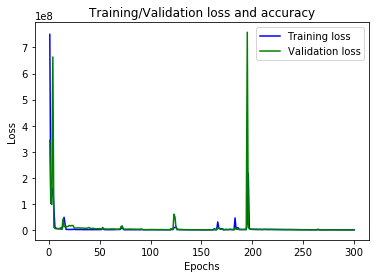

In [16]:
# 6.1. epoch, loss 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']


epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
# 6.2. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  [1691616.4144117646, 720.4930559943704]
Validataion Score:  [1551649.859, 744.2046103515625]
Test Score:  [4172464.1772151897, 1200.8999595159216]


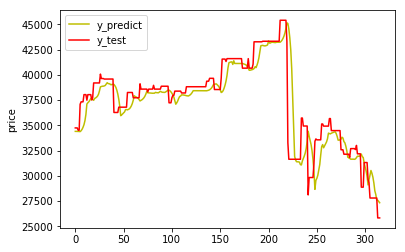

In [18]:
def show_diff(y_predict, y_label, y_test, y_test_label, y_value):

    fig, predict_ax=plt.subplots()

    predict_ax.plot(y_predict, 'y', label=y_label)

    predict_ax.plot(y_test, 'r', label=y_test_label)

    predict_ax.set_ylabel(y_value)

    predict_ax.legend(loc = 'upper left')

    plt.show()
    
#7 예측하기

y_predict = model.predict(x_test).flatten()

show_diff(y_predict, 'y_predict', y_test, 'y_test', 'price')

In [19]:
# 데이터 저장
df = pd.DataFrame(y_predict)
df.insert(0,'y_test',y_test_var)
df = df.rename(columns = {0: 'y_predict'})
df.to_csv('predict_seoulpear.csv', index=False)

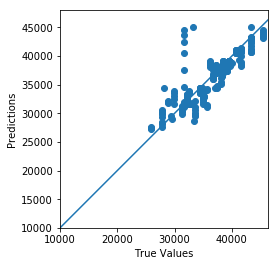

In [20]:

test_predictions = y_test

plt.scatter(y_test, y_predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10000,plt.xlim()[1]])
plt.ylim([10000,plt.ylim()[1]])
_ = plt.plot([-100000, 100000], [-100000, 100000])

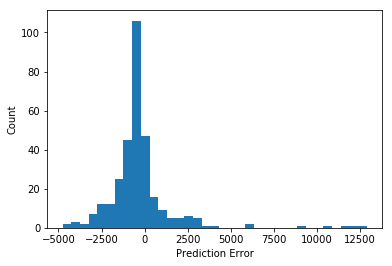

In [21]:
#오차의 분포
error = y_predict - y_test
plt.hist(error, bins = 35)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [24]:
rmse = sqrt(mean_squared_error(y_predict,y_test))
print("RMSE: {:.2f}".format(rmse))

RMSE: 2042.66


In [25]:
print("STD: {:.2f}".format(std))

STD: 4628.31
